In [1]:
import cv2
from matplotlib import pyplot
import numpy as np
from scipy.fftpack import dct
from scipy.fftpack import idct
import struct
import zlib

# Zadanie 1

In [5]:
#
# PPM file header
#
ppm_ascii_header = 'P3 30 30 255 '  
ppm_binary_header = 'P6 30 30 255 '  # TODO: implemen

#
# Image data
#
#image = numpy.array([], dtype=numpy.uint8)  
image = np.full((30, 30, 3), [255, 0, 0], dtype='uint8')

#
# Save the PPM image as an ASCII file
#
with open('lab4-ascii.ppm', 'w') as fh:
    fh.write(ppm_ascii_header)
    image.tofile(fh, sep=' ')
    fh.write('\n')

#
# Save the PPM image as a binary file
#
with open('lab4-binary.ppm', 'wb') as fh:
    fh.write(bytearray(ppm_binary_header, 'ascii'))
    image.tofile(fh)

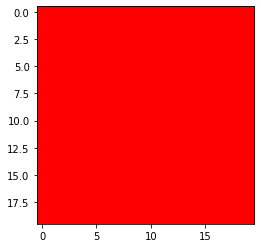

In [6]:
#
# Display image
#
image_from_file = cv2.imread('lab4-ascii.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

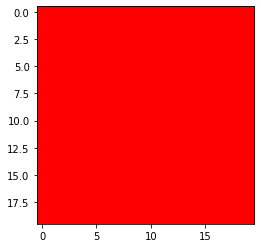

In [7]:
#
# Display image
#
image_from_file_2 = cv2.imread('lab4-binary.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file_2, cv2.COLOR_BGR2RGB))




# Zadanie 2

In [386]:
ppm_ascii_header = 'P3 224 16 255 '

image = np.linspace( [0, 0, 0], [0, 0, 255], 32, dtype=np.uint8, endpoint=False)
image = np.concatenate(
    (image, np.linspace( [0, 0, 255], [0, 255, 255], 32, dtype=np.uint8, endpoint=False)))
image = np.concatenate(
    (image, np.linspace( [0, 255, 255], [0, 255, 0], 32, dtype=np.uint8, endpoint=False)))
image = np.concatenate(
    (image, np.linspace( [0, 255, 0], [255, 255, 0], 32, dtype=np.uint8, endpoint=False)))
image = np.concatenate(
    (image, np.linspace( [255, 255, 0], [255, 0, 0], 32, dtype=np.uint8, endpoint=False)))
image = np.concatenate(
    (image, np.linspace( [255, 0, 0], [255, 0, 255], 32, dtype=np.uint8, endpoint=False)))
image = np.concatenate(
    (image, np.linspace( [255, 0, 255], [255, 255, 255], 32, dtype=np.uint8)))


with open('lab4-rainbow.ppm', 'w') as fh:
     fh.write(ppm_ascii_header)
     for i in range(16):
         image.tofile(fh, sep=' ')
         fh.write('\n')



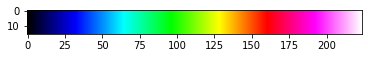

In [387]:
#
# Display image
#

image_from_file = cv2.imread('lab4-rainbow.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Zadanie 3

In [388]:
#
# Image data
#
#image = numpy.array([[255,   0,   0], [  0, 255,  0]],
#                    dtype=numpy.uint8)  
#image = np.full((10, 10, 3), [255, 0, 0], dtype='uint8')
#
# Construct signature
#
png_file_signature = b'\x89PNG\x0D\x0A\x1A\x0A' 

#
# Construct header
#
header_id = b'IHDR'  
#                 |  wysokosc     |   szerokosc|bpp|RGB|DEF|filter|Interlance
header_content = b'\x00\x00\x00\xE0\x00\x00\x00\x10\x08\x02\x00\x00\x00'  
header_size = struct.pack('!I', len(header_content))
header_crc =  struct.pack('!I', zlib.crc32(header_id+header_content))
png_file_header = header_size + header_id + header_content + header_crc

#
# Construct data
#
data_id = b'IDAT'  # TODO: implement
data_content = zlib.compress(b''.join([b'\x00' + bytes(image) for i in range(16)]))
data_size = struct.pack('!I', len(data_content))  # TODO: implement
data_crc = struct.pack('!I', zlib.crc32(data_id + data_content))
png_file_data = data_size + data_id + data_content + data_crc

#
# Consruct end
#
end_id = b'IEND'
end_content = b''
end_size = struct.pack('!I', len(end_content))
end_crc = struct.pack('!I', zlib.crc32(end_id + end_content))
png_file_end = end_size + end_id + end_content + end_crc

#
# Save the PNG image as a binary file
#
with open('lab4.png', 'wb') as fh:
    fh.write(png_file_signature)
    fh.write(png_file_header)
    fh.write(png_file_data)
    fh.write(png_file_end)

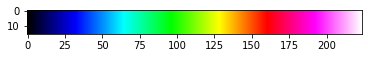

In [389]:
#
# Display image
#
image_from_file = cv2.imread('lab4.png')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Funkcje pomocnicze do zadań 4 i 5

In [390]:
#
# 2d Discrete Cosinus Transform
#
def dct2(array):
    return dct(dct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


def idct2(array):
    return idct(idct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


#
# Calculate quantisation matrices
#
# Based on: https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/jpegUpToQuant.html
#           #step-3-and-4-discrete-cosinus-transform-and-quantisation
#
_QY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 48, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

_QC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
                   [18, 21, 26, 66, 99, 99, 99, 99],
                   [24, 26, 56, 99, 99, 99, 99, 99],
                   [47, 66, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99]])


def _scale(QF):
    if QF < 50 and QF >= 1:
        scale = np.floor(5000 / QF)
    elif QF < 100:
        scale = 200 - 2 * QF
    else:
        raise ValueError('Quality Factor must be in the range [1..99]')

    scale = scale / 100.0
    return scale


def QY(QF=85):
    return _QY * _scale(QF)


def QC(QF=85):
    return _QC * _scale(QF)

# Zadania 4 i 5

In [391]:
#user-defined functions
def convert_8x8_to_channel(blocks, width):
    step = int(width / 8)
    rows = []
    for i in range(0, len(blocks), step):
        rows.append(np.concatenate( blocks[i:i+step], axis=1))
    channel = np.concatenate(rows, axis=0)
    return channel
def zig_zag(block_of_image) -> list:
    # setup of helper variables
    n = x = y = 0
    zig_zag_vector = np.zeros(64, dtype=np.uint8)
    # main loop 
    while n < 64 :
        #moving left
        while x > -1 and y <8:
            zig_zag_vector[n] = block_of_image[x , y]
            x-=1
            y+=1
            n+=1
        x+=1
        if y == 8:
            y-=1
            x+=1
        #moving right
        while y > -1 and x <8:
            zig_zag_vector[n] = block_of_image[x, y]
            y-=1
            x+=1
            n+=1
        y+=1
        if x == 8:
            x-=1 
            y+=1
    return zig_zag_vector
def downsample(image_data, sample_rate=2):
    CR = image_data[0::sample_rate,0::sample_rate,1]
    CB = image_data[0::sample_rate,0::sample_rate,2]
    Y  = image_data[0::,0::,0]
    return CR, CB, Y
def produce_blocks( channel_CR, channel_CB):
    CR_blocks = []
    CB_blocks = []
    for i in range(0, channel_CR.shape[0], 8):
        for j in range(0, channel_CR.shape[1], 8):
            CR_blocks.append(channel_CR[i:i + 8, j:j + 8])
            CB_blocks.append(channel_CB[i:i + 8, j:j + 8])
    return CR_blocks, CB_blocks 

#
# 0. Image data
#
# DONE TODO: implement (zad. 4)
image_data =np.copy(image_from_file)
#
# 1. Convert RGB to YCbCr
#
# DONE TODO: implement (zad. 4)
image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YCrCb)

width = image_data.shape[1]
height =  image_data.shape[0]
xxxx = image_data.shape[2]
# print(width, height, xxxx)
#
# 2. Downsampling on Cb and Cr channels
#
CR_0, CB_0, Y = downsample(image_data, sample_rate=1)
CR_2, CB_2, Y = downsample(image_data, sample_rate=2)


width_0, height_0 = CR_0.shape
width_2, height_2 = CR_2.shape
#
# 3. Produce 8x8 blocks
#
# ??? TODO: implement (zad. 4)
blocks = (width * height) // 64

y_blocks= []

for i in range(0, Y.shape[0], 8):
    for j in range(0, Y.shape[1], 8):
        y_blocks.append(  Y[i:i + 8, j:j + 8])

CR_0_blocks, CB_0_blocks = produce_blocks(CR_0, CB_0)

CR_2_blocks, CB_2_blocks= produce_blocks(CR_2, CB_2)






#
# 7. Zig-zag
#

Y_zig_zag_blocks =  np.asarray([ zig_zag(y_blocks[x]) for x in range(len(y_blocks)) ])

CR_0_zig_zag_blocks = np.asarray([ zig_zag(CR_0_blocks[x]) for x in range(len(CR_0_blocks))])
CB_0_zig_zag_blocks = np.asarray([ zig_zag(CB_0_blocks[x]) for x in range(len(CB_0_blocks))])

CR_2_zig_zag_blocks = np.asarray([ zig_zag(CR_2_blocks[x]) for x in range(len(CR_2_blocks))])
CB_2_zig_zag_blocks = np.asarray([ zig_zag(CB_2_blocks[x]) for x in range(len(CB_2_blocks))])




#
# 8. Flatten, concatenate, compress and calculate the size -- how many bytes?
#
# TODO: implement (zad. 4)

# flattened :D
def compress(Y, CR, CB):
    concat = np.concatenate( (Y.flatten(), CR.flatten(), CB.flatten()), axis=0 )
    compress = zlib.compress(concat)
    return len(str(compress))


compress_0 =  compress(Y_zig_zag_blocks, CR_0_zig_zag_blocks, CB_0_zig_zag_blocks)
compress_2 =  compress(Y_zig_zag_blocks, CR_2_zig_zag_blocks, CB_2_zig_zag_blocks)

print(f"Dlugosc bez probkowania: {compress_0}")
print(f"Dlugosc z probkowaniem co 2: {compress_2}") 
# print(f"Dlugosc z probkowaniem co 4: {len(str(compress_4))}")

#
# 7'. Undo Zig Zag
#
# We can skip it in this exercise! We did Zig Zag only for analysis in step 8.
# You can continue with result from step 6. instead of implementing undo here.
#

#
# 6'. Nothing to do here   ¯\_(ツ)_/¯
#
# No conversion is really needed here, just proceed to the next step.
#

#
# 5'. Reverse division by quantisation matrix -- multiply
#
# TODO: implement (zad. 5)

#
# 4'. Reverse DCT
#
# TODO: implement (zad. 5)

#
# 3'. Combine 8x8 blocks to original image
#
y_channel_reforged = convert_8x8_to_channel(y_blocks, width)
CR_2 = convert_8x8_to_channel(CR_2_blocks, width)
CB_2 = convert_8x8_to_channel(CB_2_blocks, width)
#  height, width = CR_channel_reforged.shape

#
# 2'. Upsampling on Cb and Cr channels
#
image_0 = np.copy(image_data)
image_2 = np.copy(image_data)
image_2[:,:,0] = y_channel_reforged
image_4 = np.copy(image_data)

# bez kompresji 
for row in range(0, width_0):
    for column in range(height_0):
        image_0[row, column, 1] = CR_0[row,column]
        image_0[row, column, 2] = CB_0[row,column]

# co drugie
for row in range(0, width_2 ):
      for column in range(0, height_2):
         image_2[2*row+1, 2*column, 1] = CR_2[row, column]
         image_2[2*row+1, 2*column, 2] = CB_2[row, column]

         image_2[2*row, 2*column+1, 1] = CR_2[row, column]
         image_2[2*row, 2*column+1, 2] = CB_2[row, column]
        
         image_2[2*row+1, 2*column+1, 1] = CR_2[row, column]
         image_2[2*row+1, 2*column+1, 2] = CB_2[row, column]

#
# 1'. Convert YCbCr to RGB
#
image_0 =  cv2.cvtColor(image_0, cv2.COLOR_YCrCb2RGB)
image_2 =  cv2.cvtColor(image_2, cv2.COLOR_YCrCb2RGB)
#
# 0'. Save the decoded image -- as PPM or PNG
#
# to co prostsze :P 
ppm_ascii_header = 'P3 224 16 255 '


with open('lab4-po-kompresji-i-dekompresji-0.ppm', 'w') as file:
     file.write(ppm_ascii_header)
     image_0.tofile(file, sep = ' ')
with open('lab4-po-kompresji-i-dekompresji-2.ppm', 'w') as file:
     file.write(ppm_ascii_header)
     image_2.tofile(file, sep = ' ')

     


Dlugosc bez probkowania: 5532
Dlugosc z probkowaniem co 2: 3771


In [392]:
#
# Display image
#
image_from_file = cv2.imread('lab4-po-kompresji-i-dekompresji-2.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

imread_('lab4-po-kompresji-i-dekompresji-2.ppm'): can't read data: OpenCV(4.5.5) /io/opencv/modules/imgcodecs/src/bitstrm.cpp:110: error: (-2:Unspecified error) Unexpected end of input stream in function 'readBlock'



error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# Obserwacje z zadań 4 i 5